# Purpose

**NOTE: See `matplotlib/images_with_transparency-explore.ipynb` and `-implement.ipynb` for better info.**

How to overlay one image on top of another, with the top image having regions of transparency to reveal the corresponding regions of the underlying image.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
mpl.__version__

'3.3.2'

# Grayscale background and RGBA foreground arrays

## Background image

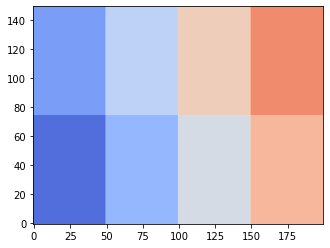

In [3]:
img_shape = (150, 200)

params_background = dict(
    origin="lower", cmap="coolwarm", vmin=0, vmax=255
)

background = np.zeros(img_shape, dtype=np.uint8)
x_band = int(img_shape[1] / 4)
y_band = int(img_shape[0] / 2)
background[:, :x_band] = 50
background[:, x_band : 2 * x_band] = 100
background[:, 2 * x_band : 3 * x_band] = 150
background[:, 3 * x_band :] = 200
background[:y_band, :] -= 30

fig, ax = plt.subplots()
ax.imshow(background, **params_background);

## Foreground image (mask)

img_mask_rgba.shape=(150, 200, 4)


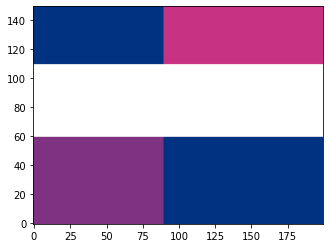

In [4]:
params_foreground = dict(
    origin="lower"
)


img_mask_rgba = np.zeros((*img_shape, 4), dtype=np.uint8)
# Red
img_mask_rgba[:90, :90, 0] = 128
img_mask_rgba[90:, 90:, 0] = 200
# Green
img_mask_rgba[:, :, 1] = 50
# Blue
img_mask_rgba[:, :, 2] = 130
# Alpha
img_mask_rgba[  :,    :, 3] = 255
img_mask_rgba[60:110, :, 3] = 0

print(f"{img_mask_rgba.shape=}")

fig, ax = plt.subplots()
ax.imshow(img_mask_rgba, **params_foreground);

## Foreground on top of background

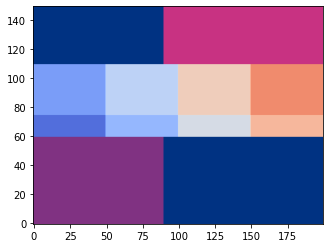

In [5]:
fig, ax = plt.subplots()
ax.imshow(background, **params_background);
ax.imshow(img_mask_rgba, **params_foreground);

# Masking with Boolean array

## Create mask based on array values

In [6]:
a= np.array([[-12,-31,5],[7,0,-9]])
a

array([[-12, -31,   5],
       [  7,   0,  -9]])

In [7]:
zero_mod_array= 0 ==(a%7)
zero_mod_array

array([[False, False, False],
       [ True,  True, False]])

## Apply mask (identity matrix) to an array

In [8]:
x = np.array([[2,-1,4],
              [3,-3,1],
              [9,-7,2]])
x

array([[ 2, -1,  4],
       [ 3, -3,  1],
       [ 9, -7,  2]])

In [9]:
mask = np.identity(3)
mask

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.where(mask, x, 0)

array([[ 2,  0,  0],
       [ 0, -3,  0],
       [ 0,  0,  2]])

## Create mask from array values and use to apply transform to non-masked values

In [11]:
x = np.array([[2,1,4,7],
              [0,0,1,0],
              [9,7,2,0]])
x

array([[2, 1, 4, 7],
       [0, 0, 1, 0],
       [9, 7, 2, 0]])

### Mask - mask zero values

In [12]:
mask = 0 ==(x==0)
mask

array([[ True,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True,  True, False]])

### Subtract 5 from all non-zero values and leave 0 values untouched

In [13]:
np.where(mask, x - 5, 0)

array([[-3, -4, -1,  2],
       [ 0,  0, -4,  0],
       [ 4,  2, -3,  0]])

### Subtract value from all non-zero values to have equal magnitude largest positive and negative numbers

In [14]:
np.where(mask, x - 0.5*(np.max(x)+1), 0)

array([[-3., -4., -1.,  2.],
       [ 0.,  0., -4.,  0.],
       [ 4.,  2., -3.,  0.]])

# Use extent

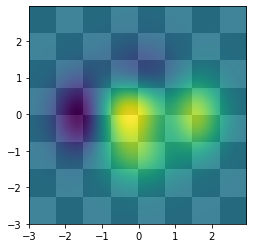

In [15]:
# Modified from 
# https://matplotlib.org/stable/gallery/images_contours_and_fields/layer_images.html


def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig, ax = plt.subplots(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = ax.imshow(Z1, cmap=plt.cm.gray, interpolation="nearest", extent=extent)

Z2 = func3(X, Y)

im2 = ax.imshow(
    Z2, cmap=plt.cm.viridis, alpha=0.9, interpolation="bilinear", extent=extent
)

# Not really related

AttributeError: 'AxesImage' object has no attribute 'callbacks'

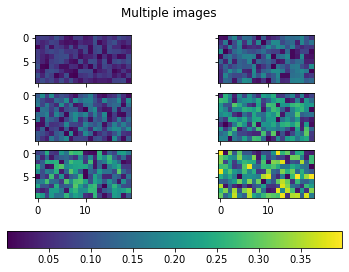

In [16]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/multi_image.html

np.random.seed(19680801)
Nr = 3
Nc = 2

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle("Multiple images")

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20)
        images.append(axs[i, j].imshow(data))
        axs[i, j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation="horizontal", fraction=0.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (
            changed_image.get_cmap() != im.get_cmap()
            or changed_image.get_clim() != im.get_clim()
        ):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


# The code below works with matplotlib v3.6.3
# but not with v 3.3.2
for im in images:
    im.callbacks.connect("changed", update)
